In [213]:
# XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players 
# in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to 
# understand the market before taking final decision.

# Project delivery:

# You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

# The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

# Data Set:

# You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

# Below are the list of datasets which are provided for the analysis:

# Cab_Data.csv – this file includes details of transaction for 2 cab companies

# Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

# Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

# City.csv – this file contains list of US cities, their population and number of cab users


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [287]:
# Define the folder path where the CSV files are located
folder_path = r'/Users/shuyiyu/Desktop'
# Check if the folder exists
if os.path.exists(folder_path):
    print("Folder path exists!")
else:
    print("Folder path does NOT exist!")
    

# List of file names for looping
file_names = ['Cab_Data.csv', 'Customer_ID.csv', 'Transaction_ID.csv', 'City.csv','us_holiday_dates.csv']

# dict to store df
dataframes = {}

# Loop through the file names and load each into a DataFrame
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    # Use the file name without extension store as key name
    df_name = file_name.split('.')[0]
    # store in the 'dataframes' dictionary
    dataframes[df_name] = pd.read_csv(file_path)  

# show first five rows of each df
for name, df in dataframes.items():
    print(f'\n{name} DataFrame:')
    print(df.head())

# print the keys of the dictionary to verify
print(dataframes.keys())

# loop each df in the dataframes dict
for name, df in dataframes.items():
    print(f'\n{name} DataFrame Summary Stats:')
    print(df.describe())

Folder path exists!

Cab_Data DataFrame:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

Customer_ID DataFrame:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

Transaction_ID 

In [215]:
# Data cleaning and Preprocessing 

# ensured there's no missing values
for name, df in dataframes.items():
    print(f"\n Missing values in {name}: ")
    print(df.isnull().sum())

#df_cab['Date of Travel'] = pd.to_numeric(df_cab['Date of Travel'], errors='coerce')
# ensure data in the correct data type 
#df_cab['Date of Travel'] = pd.to_datetime(df_cab['Date of Travel'], origin='julian', unit='D')
#print(df_cab['Date of Travel'].head())
# df_cab['Date of Travel'] = df_cab['Date of Travel'] / 1000  # Example scaling down
# df_cab['Date of Travel'] = pd.to_datetime(df_cab['Date of Travel'], origin='2016-01-01', unit='D')

# Original data had suspecius 'Date of Travel e.g: 42377, 42375 that is unable to convert or find appropriate orgin that meets the requiremnt of this project
# date requirement: 31/01/2016 to 31/12/2018
# I decided to randomly generate these dates from range that satisfies project instructions and i will made bias accomodations to the new data so that it is more synthetic to realistic data




 Missing values in Cab_Data: 
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

 Missing values in Customer_ID: 
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

 Missing values in Transaction_ID: 
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

 Missing values in City: 
City          0
Population    0
Users         0
dtype: int64

 Missing values in weather_nyc_2016: 
date                   0
maximum temerature     0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

 Missing values in us_holiday_dates: 
Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64


In [294]:
# understand the US holiday dates
holidays_df = pd.read_csv(r'/Users/shuyiyu/Desktop/us_holiday_dates.csv')
print(holidays_df.head(100))

# convert the 'Date' column to datetime format
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'], format='%Y-%m-%d')

# filter the DataFrame for dates between 31/01/2016 and 31/12/2018
filtered_holidays = holidays_df[
    (holidays_df['Date'] >= '2016-01-31') &
    (holidays_df['Date'] <= '2018-12-31')
]

# find unique year-month-day combinations
unique_dates = filtered_holidays['Date'].dt.strftime('%y-%m-%d').unique()

# Display the unique year-month-day combinations
print("Unique Year-Month-Day combinations between 31/01/2016 and 31/12/2018:")
print(unique_dates)

holidays_df.shape


          Date      Holiday    WeekDay  Month  Day  Year
0   2004-07-04  4th of July     Sunday      7    4  2004
1   2005-07-04  4th of July     Monday      7    4  2005
2   2006-07-04  4th of July    Tuesday      7    4  2006
3   2007-07-04  4th of July  Wednesday      7    4  2007
4   2008-07-04  4th of July     Friday      7    4  2008
..         ...          ...        ...    ...  ...   ...
95  2007-06-19   Juneteenth    Tuesday      6   19  2007
96  2008-06-19   Juneteenth   Thursday      6   19  2008
97  2009-06-19   Juneteenth     Friday      6   19  2009
98  2010-06-19   Juneteenth   Saturday      6   19  2010
99  2011-06-19   Juneteenth     Sunday      6   19  2011

[100 rows x 6 columns]
Unique Year-Month-Day combinations between 31/01/2016 and 31/12/2018:
['16-07-04' '17-07-04' '18-07-04' '16-12-25' '17-12-25' '18-12-25'
 '16-12-24' '17-12-24' '18-12-24' '18-10-08' '17-10-09' '16-10-10'
 '18-04-08' '17-04-16' '16-05-01' '16-06-19' '17-06-19' '18-06-19'
 '18-09-03' '17-09-04

(342, 6)

In [217]:

# Define the date ranges for each year
dates_2016 = pd.date_range(start='2016-01-1', end='2016-12-31', freq='D')
dates_2017 = pd.date_range(start='2017-01-01', end='2017-12-31', freq='D')
dates_2018 = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D')

# Define the specific holiday dates and identify holiday months
holiday_dates = pd.to_datetime([
    '2016-07-04', '2017-07-04', '2018-07-04', '2016-12-25', '2017-12-25', 
    '2018-12-25', '2016-12-24', '2017-12-24', '2018-12-24', '2018-10-08',
    '2017-10-09', '2016-10-10', '2018-04-08', '2017-04-16', '2016-05-01',
    '2016-06-19', '2017-06-19', '2018-06-19', '2018-09-03', '2017-09-04',
    '2016-09-05', '2018-09-01', '2018-09-02', '2017-09-02', '2017-09-03',
    '2016-09-03', '2016-09-04', '2018-01-15', '2017-01-16', '2018-05-28',
    '2017-05-29', '2016-05-30', '2017-01-01', '2018-01-01', '2016-12-31',
    '2017-12-31', '2018-12-31', '2018-11-22', '2017-11-23', '2016-11-24',
    '2018-11-21', '2017-11-22', '2016-11-23', '2016-02-14', '2017-02-14',
    '2018-02-14', '2016-11-11', '2017-11-11', '2018-11-11', '2016-02-15',
    '2018-02-19', '2017-02-20', '2016-03-27', '2018-04-01'
])

# identified top 5 holiday months (common US holidays: Dec, Jul, Nov, Jan, Sept)
top_5_holiday_months = [12, 7, 11, 1, 9]  

# assign stronger weights to these months
month_weights = {month: 0.4 if month in top_5_holiday_months else 0.34 for month in range(1, 13)}

# create a biased date pool for each year
dates_2016_biased = np.concatenate([
    np.random.choice(dates_2016[dates_2016.month == month], size=int(len(df_cab) * month_weights[month]), replace=True)
    for month in range(1, 13)
])
dates_2017_biased = np.concatenate([
    np.random.choice(dates_2017[dates_2017.month == month], size=int(len(df_cab) * month_weights[month]), replace=True)
    for month in range(1, 13)
])
dates_2018_biased = np.concatenate([
    np.random.choice(dates_2018[dates_2018.month == month], size=int(len(df_cab) * month_weights[month]), replace=True)
    for month in range(1, 13)
])

# combine, shuffle, and assign
biased_dates = np.concatenate([dates_2016_biased, dates_2017_biased, dates_2018_biased])
np.random.shuffle(biased_dates)

# Ensure the length of biased_dates matches df_cab
if len(biased_dates) < len(df_cab):
    additional_dates = np.random.choice(biased_dates, size=len(df_cab) - len(biased_dates), replace=True)
    biased_dates = np.concatenate([biased_dates, additional_dates])

df_cab['New Date of Travel'] = biased_dates[:len(df_cab)]

# extract Year and Month for visualization
df_cab['YearMonth'] = df_cab['New Date of Travel'].dt.to_period('M')

# compare data based on company Pink Cab and Yellow Cab
pink_cab = df_cab[df_cab['Company'] == 'Pink Cab']
yellow_cab = df_cab[df_cab['Company'] == 'Yellow Cab']



/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_33699/889230558.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(pink_month_year_distribution.index.astype(str), rotation=90)
/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_33699/889230558.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(yellow_month_year_distribution.index.astype(str), rotation=90)


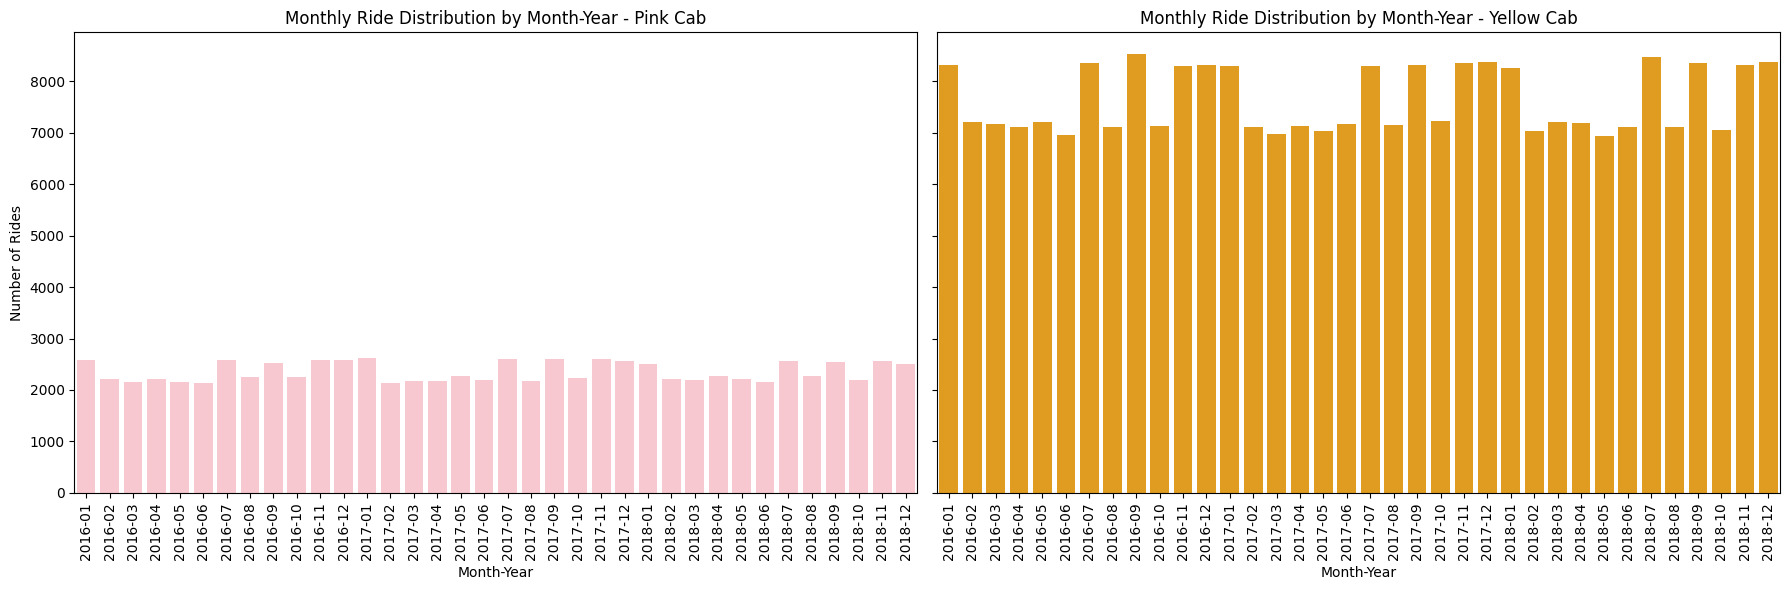

In [281]:

# Extract Month and Year from 'New Date of Travel'
df_cab['Month-Year'] = df_cab['New Date of Travel'].dt.to_period('M')


#Group by 'Month-Year' and count rides for each company
pink_month_year_distribution = pink_cab.groupby('Month-Year').size()
yellow_month_year_distribution = yellow_cab.groupby('Month-Year').size()

# Create side-by-side bar plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot for Pink Cab
sns.barplot(x=pink_month_year_distribution.index.astype(str), y=pink_month_year_distribution.values, ax=axes[0], color='pink')
axes[0].set_title('Monthly Ride Distribution by Month-Year - Pink Cab')
axes[0].set_xlabel('Month-Year')
axes[0].set_ylabel('Number of Rides')
axes[0].set_xticklabels(pink_month_year_distribution.index.astype(str), rotation=90)

# Plot for Yellow Cab
sns.barplot(x=yellow_month_year_distribution.index.astype(str), y=yellow_month_year_distribution.values, ax=axes[1], color='orange')
axes[1].set_title('Monthly Ride Distribution by Month-Year - Yellow Cab')
axes[1].set_xlabel('Month-Year')
axes[1].set_ylabel('Number of Rides')
axes[1].set_xticklabels(yellow_month_year_distribution.index.astype(str), rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



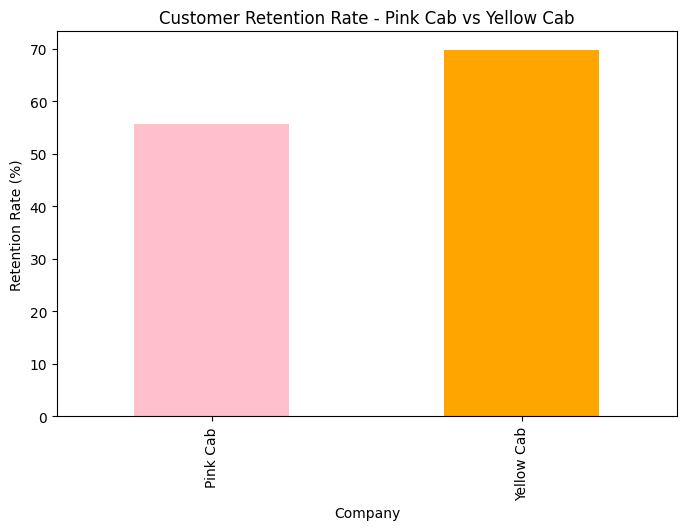

In [219]:
df_transaction = pd.read_csv(r'/Users/shuyiyu/Desktop/Transaction_ID.csv')

# merge the Cab_Data with Transaction_ID to get Customer information
df_merged = pd.merge(df_cab, df_transaction, on='Transaction ID', how='inner')

# identify Repeat Customers
# Group by Customer ID and Company, and count the number of rides per customer
rides_per_customer = df_merged.groupby(['Customer ID', 'Company']).size().reset_index(name='Ride_Count')

# determine the number of customers who have taken more than one ride (Repeat Customers)
repeat_customers = rides_per_customer[rides_per_customer['Ride_Count'] > 1]

# calculate Retention Rate for each company
total_customers = rides_per_customer.groupby('Company')['Customer ID'].nunique()
repeat_customer_count = repeat_customers.groupby('Company')['Customer ID'].nunique()

retention_rate = (repeat_customer_count / total_customers) * 100

# visualize the Retention Rate plot
retention_rate.plot(kind='bar', color=['pink', 'orange'], figsize=(8, 5))
plt.title('Customer Retention Rate - Pink Cab vs Yellow Cab')
plt.xlabel('Company')
plt.ylabel('Retention Rate (%)')
plt.show()

In [220]:
# Hypothesis: which company has higher revenue growth over time?

# Calculate Revenue per Ride
df_merged['Revenue'] = df_merged['Price Charged'] - df_merged['Cost of Trip']

# Group by 'Month-Year' and 'Company' to calculate total monthly revenue
monthly_revenue = df_merged.groupby(['Month-Year', 'Company'])['Revenue'].sum().reset_index()

# Pivot the data to have 'Month-Year' as rows and each company as columns
monthly_revenue_pivot = monthly_revenue.pivot(index='Month-Year', columns='Company', values='Revenue')

# Calculate the month-over-month percentage change (Revenue Growth)
revenue_growth = monthly_revenue_pivot.pct_change() * 100


Descriptive Statistics for Pink Cab Revenue:
count    84711.000000
mean        62.652174
std         77.590378
min       -220.060000
25%         11.206000
50%         41.500000
75%         93.965000
max       1119.480000
Name: Revenue, dtype: float64

Descriptive Statistics for Yellow Cab Revenue:
count    274681.000000
mean        160.259986
std         171.823833
min        -176.930800
25%          37.180000
50%         102.000000
75%         228.670400
max        1463.966000
Name: Revenue, dtype: float64


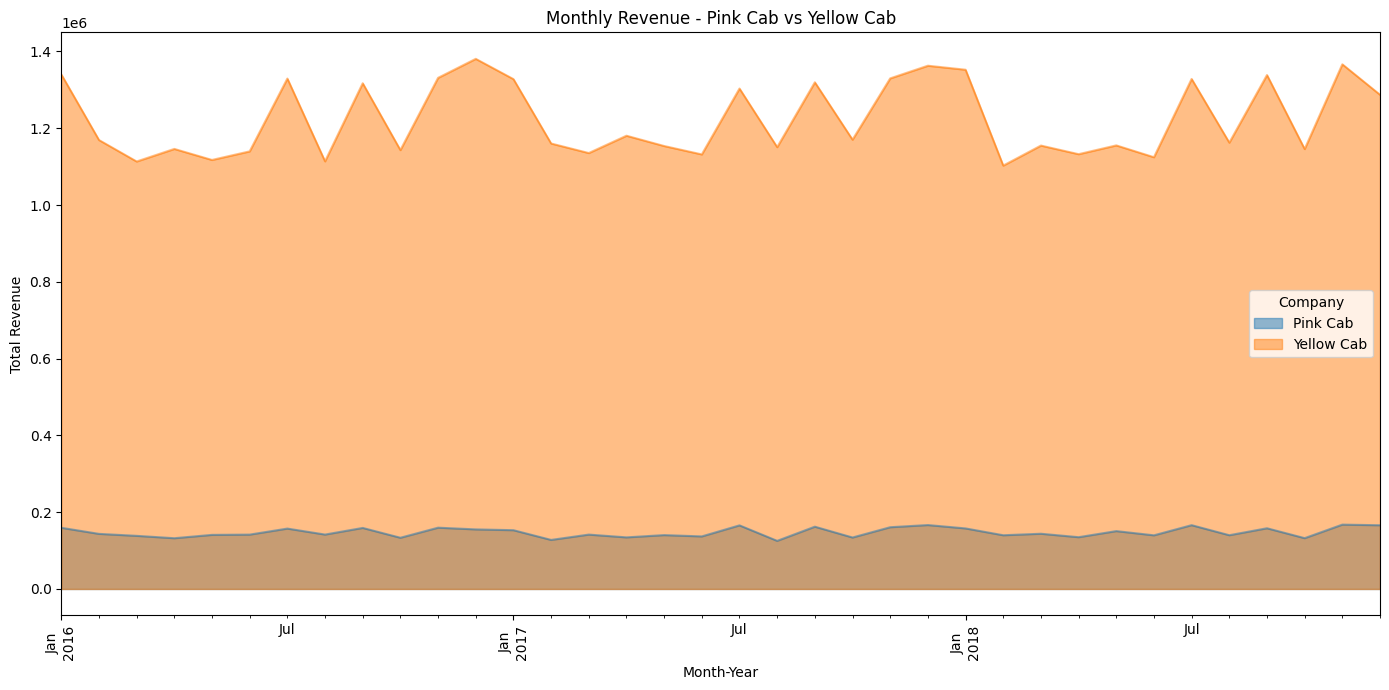

In [282]:

#Hypothesis: which company has higher revenue growth over time?
# Calculate Revenue per Ride if not already done
df_merged['Revenue'] = df_merged['Price Charged'] - df_merged['Cost of Trip']

# Filter the data for each company
pink_cab_revenue = df_merged[df_merged['Company'] == 'Pink Cab']['Revenue']
yellow_cab_revenue = df_merged[df_merged['Company'] == 'Yellow Cab']['Revenue']
#Hypothesis: which company has higher revenue growth over time?

# Print descriptive statistics for each company
print("Descriptive Statistics for Pink Cab Revenue:")
print(pink_cab_revenue.describe())

print("\nDescriptive Statistics for Yellow Cab Revenue:")
print(yellow_cab_revenue.describe())

monthly_revenue_pivot.plot(kind='area', stacked=False, figsize=(14, 7), alpha=0.5)
plt.title('Monthly Revenue - Pink Cab vs Yellow Cab')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.legend(title='Company')
plt.tight_layout()
plt.show()

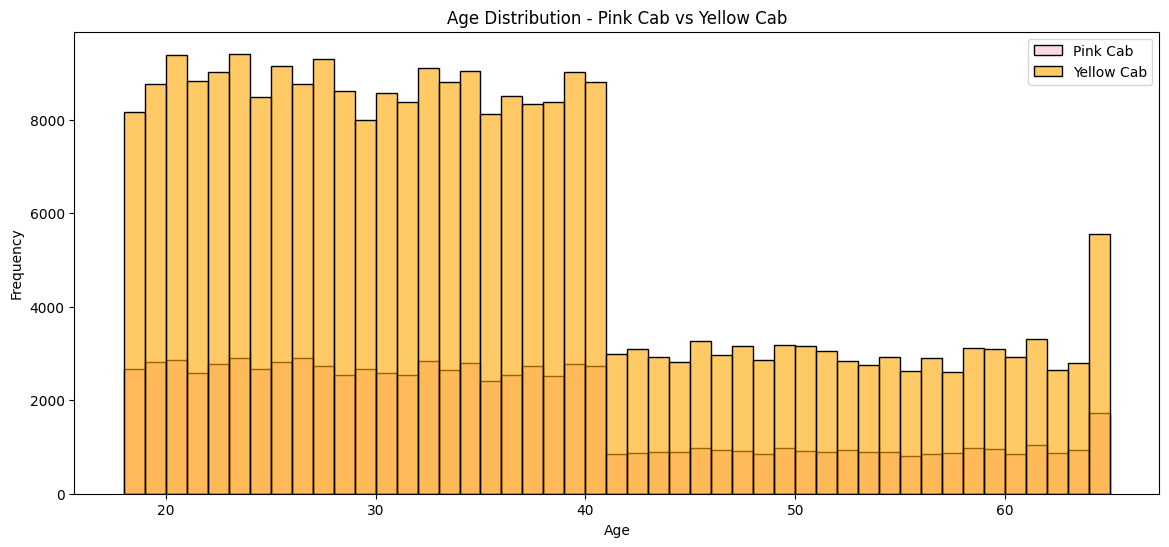

/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_33699/1015161468.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rides_by_income_bracket = df_customer_revenue.groupby(['Income Bracket', 'Company']).size().unstack().fillna(0)


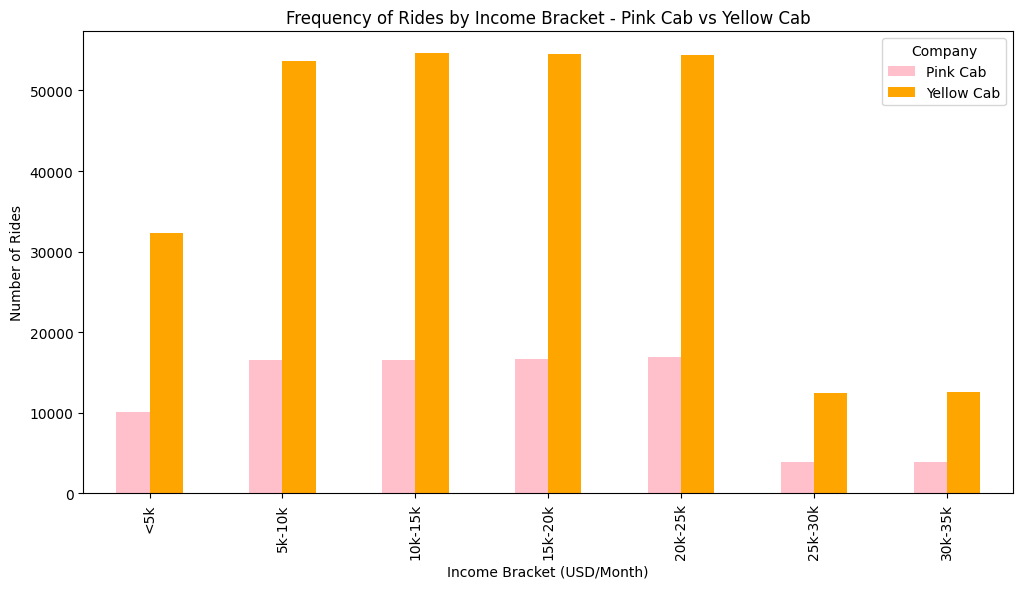

In [222]:
#Hypothesis: What are the attributes of these customer segments?
# Filter data for each company
pink_cab_age = df_customer_revenue[df_customer_revenue['Company'] == 'Pink Cab']['Age']
yellow_cab_age = df_customer_revenue[df_customer_revenue['Company'] == 'Yellow Cab']['Age']

# Plot Age Distribution for Pink Cab
plt.figure(figsize=(14, 6))
sns.histplot(pink_cab_age, bins=range(18, 66), kde=False, color='pink', label='Pink Cab', alpha=0.6)
sns.histplot(yellow_cab_age, bins=range(18, 66), kde=False, color='orange', label='Yellow Cab', alpha=0.6)

plt.title('Age Distribution - Pink Cab vs Yellow Cab')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Assuming df_customer_revenue is the merged DataFrame with Customer data and Revenue

# Create income brackets
income_brackets = pd.cut(df_customer_revenue['Income (USD/Month)'], 
                         bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000],
                         labels=['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k'])

df_customer_revenue['Income Bracket'] = income_brackets

# Calculate the frequency of rides within each income bracket for each company
rides_by_income_bracket = df_customer_revenue.groupby(['Income Bracket', 'Company']).size().unstack().fillna(0)

# Plot the results
rides_by_income_bracket.plot(kind='bar', stacked=False, color=['pink', 'orange'], figsize=(12, 6))
plt.title('Frequency of Rides by Income Bracket - Pink Cab vs Yellow Cab')
plt.xlabel('Income Bracket (USD/Month)')
plt.ylabel('Number of Rides')
plt.show()

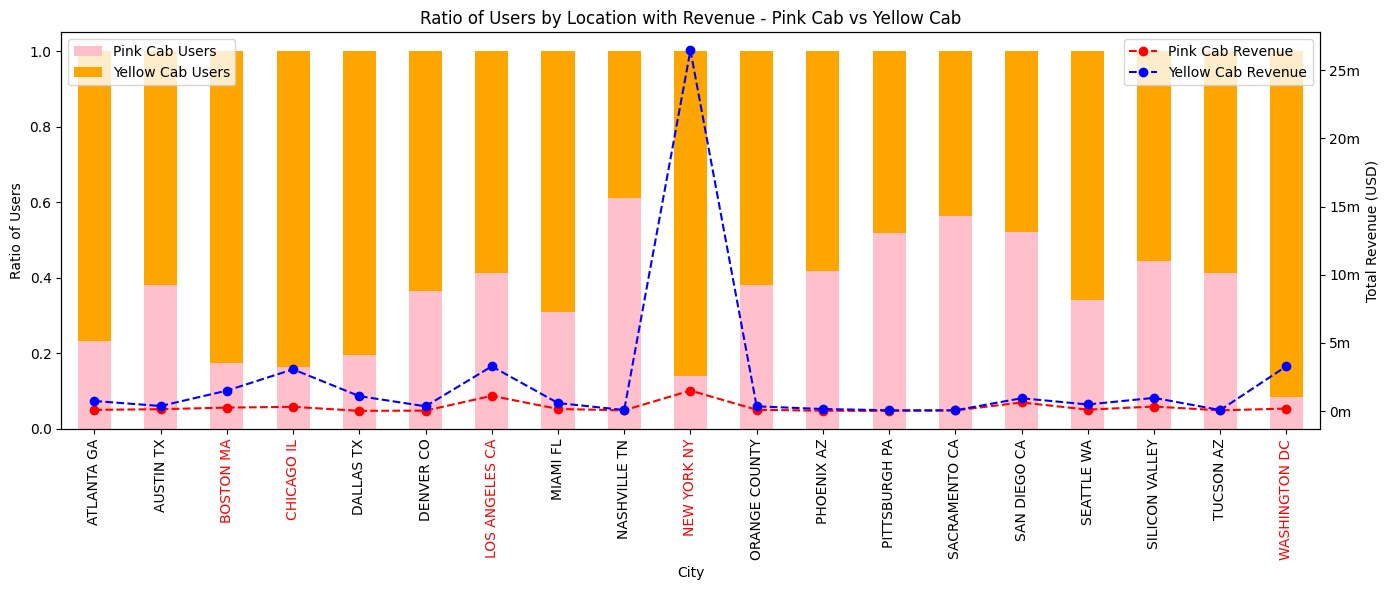

In [244]:

from matplotlib.ticker import FuncFormatter
# Hypothesis: Does revenue proportionally increase with increase in number of customers differences in both companies?​

# Function to format the y-axis in millions (m)
def thousands_formatter(x, pos):
    return f'{int(x/1000000)}m'

# Group by City and Company to count the number of users
city_user_distribution = df_customer_revenue.groupby(['City', 'Company']).size().unstack().fillna(0)

# Calculate the ratio of users for each city
city_user_distribution['Total'] = city_user_distribution.sum(axis=1)
city_user_distribution['Pink Cab Ratio'] = city_user_distribution['Pink Cab'] / city_user_distribution['Total']
city_user_distribution['Yellow Cab Ratio'] = city_user_distribution['Yellow Cab'] / city_user_distribution['Total']

# Calculate total revenue by city for each company
city_revenue_distribution = df_customer_revenue.groupby(['City', 'Company'])['Revenue'].sum().unstack().fillna(0)

# Plotting the stacked bar plot for user ratio
fig, ax1 = plt.subplots(figsize=(14, 6))

city_user_distribution[['Pink Cab Ratio', 'Yellow Cab Ratio']].plot(kind='bar', stacked=True, color=['pink', 'orange'], ax=ax1)

# Adding a secondary y-axis for revenue
ax2 = ax1.twinx()
city_revenue_distribution.plot(kind='line', ax=ax2, color=['red', 'blue'], marker='o', linestyle='dashed')

# Titles and labels
ax1.set_title('Ratio of Users by Location with Revenue - Pink Cab vs Yellow Cab')
ax1.set_ylabel('Ratio of Users')
ax1.set_xlabel('City')
ax2.set_ylabel('Total Revenue (USD)')
ax1.legend(['Pink Cab Users', 'Yellow Cab Users'], loc='upper left')
ax2.legend(['Pink Cab Revenue', 'Yellow Cab Revenue'], loc='upper right')

# Apply the custom formatter to the secondary y-axis
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Highlight key cities (e.g., Top 5 cities by total revenue)
top_5_cities = city_revenue_distribution.sum(axis=1).nlargest(5).index
for city in top_5_cities:
    ax1.get_xticklabels()[city_user_distribution.index.get_loc(city)].set_color('red')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

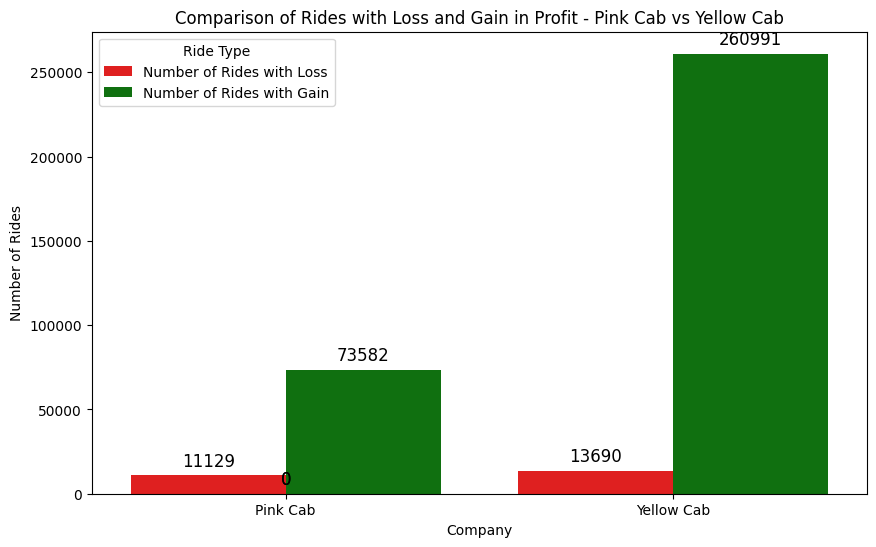

In [259]:
# Hypothesis: What are the top profitable five cities for each company?
# Filter the dataset for rides with a loss and with a gain
rides_with_loss = df_customer_revenue[df_customer_revenue['Price Charged'] < df_customer_revenue['Cost of Trip']]
rides_with_gain = df_customer_revenue[df_customer_revenue['Price Charged'] >= df_customer_revenue['Cost of Trip']]

# Step 2: Group by Company and count the number of rides with a loss and with a gain
rides_loss_count = rides_with_loss.groupby('Company').agg({'Transaction ID': 'count'}).rename(columns={'Transaction ID': 'Number of Rides with Loss'})
rides_gain_count = rides_with_gain.groupby('Company').agg({'Transaction ID': 'count'}).rename(columns={'Transaction ID': 'Number of Rides with Gain'})

# Step 3: Melt the data for easier plotting
rides_count = pd.merge(rides_loss_count, rides_gain_count, on='Company').reset_index()
rides_count_melted = pd.melt(rides_count, id_vars=['Company'], value_vars=['Number of Rides with Loss', 'Number of Rides with Gain'])

# Step 4: Plot the data
plt.figure(figsize=(10, 6))

# Bar plot with dodge=True to separate the bars
bar_plot = sns.barplot(x='Company', y='value', hue='variable', data=rides_count_melted, dodge=True, palette={'Number of Rides with Loss': 'red', 'Number of Rides with Gain': 'green'})

# Annotate bars with the actual numbers
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', xytext=(0, 10), 
                      textcoords='offset points', fontsize=12)

# Add labels and title
plt.title('Comparison of Rides with Loss and Gain in Profit - Pink Cab vs Yellow Cab')
plt.xlabel('Company')
plt.ylabel('Number of Rides')
plt.legend(title='Ride Type')

# Show plot
plt.show()

/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_33699/2297147272.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='City', data=top_5_profit_cities, palette='YlGnBu', orient='h')


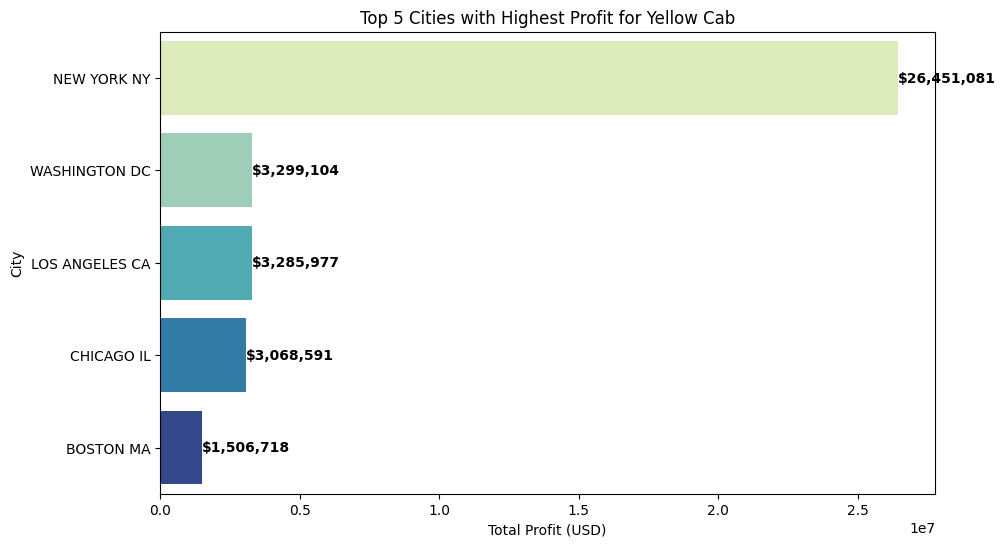

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cab and other preprocessing steps are already done

# Calculate Profit for each ride
df_cab['Profit'] = df_cab['Price Charged'] - df_cab['Cost of Trip']

# Filter only Yellow Cab data
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab']

# Group by City and sum the Profit
profit_by_city_yellow = yellow_cab_data.groupby('City')['Profit'].sum().reset_index()

# Sort by Profit and get the top 5 cities
top_5_profit_cities = profit_by_city_yellow.sort_values(by='Profit', ascending=False).head(5)

# Plotting the top 5 cities with the highest profit for Yellow Cab
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='City', data=top_5_profit_cities, palette='YlGnBu', orient='h')

# Add the dollar amount on top of each bar
for index, value in enumerate(top_5_profit_cities['Profit']):
    plt.text(value, index, f'${value:,.0f}', va='center', ha='left', color='black', fontweight='bold')

plt.title('Top 5 Cities with Highest Profit for Yellow Cab')
plt.xlabel('Total Profit (USD)')
plt.ylabel('City')
plt.show()

/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_33699/3779762527.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='City', data=top_5_profit_cities_pink, palette='RdPu', orient='h')


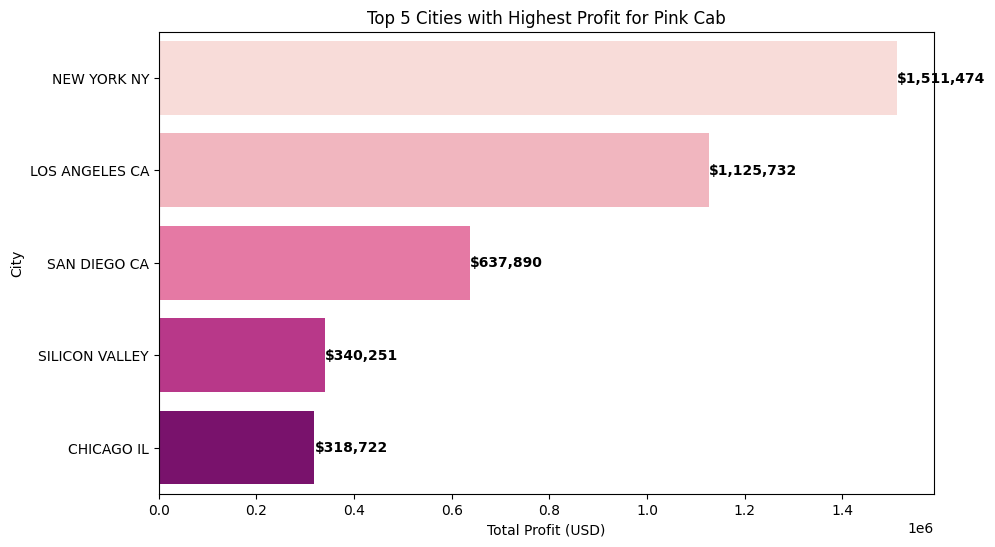

In [274]:
# Filter only Pink Cab data
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab']

# Group by City and sum the Profit
profit_by_city_pink = pink_cab_data.groupby('City')['Profit'].sum().reset_index()

# Sort by Profit and get the top 5 cities
top_5_profit_cities_pink = profit_by_city_pink.sort_values(by='Profit', ascending=False).head(5)

# Plotting the top 5 cities with the highest profit for Pink Cab
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit', y='City', data=top_5_profit_cities_pink, palette='RdPu', orient='h')

# Add the dollar amount on top of each bar
for index, value in enumerate(top_5_profit_cities_pink['Profit']):
    plt.text(value, index, f'${value:,.0f}', va='center', ha='left', color='black', fontweight='bold')

plt.title('Top 5 Cities with Highest Profit for Pink Cab')
plt.xlabel('Total Profit (USD)')
plt.ylabel('City')
plt.show()

/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_33699/3079627545.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loss', y='City', data=top_3_loss_cities_yellow, palette='Oranges_r', orient='h', legend=False)


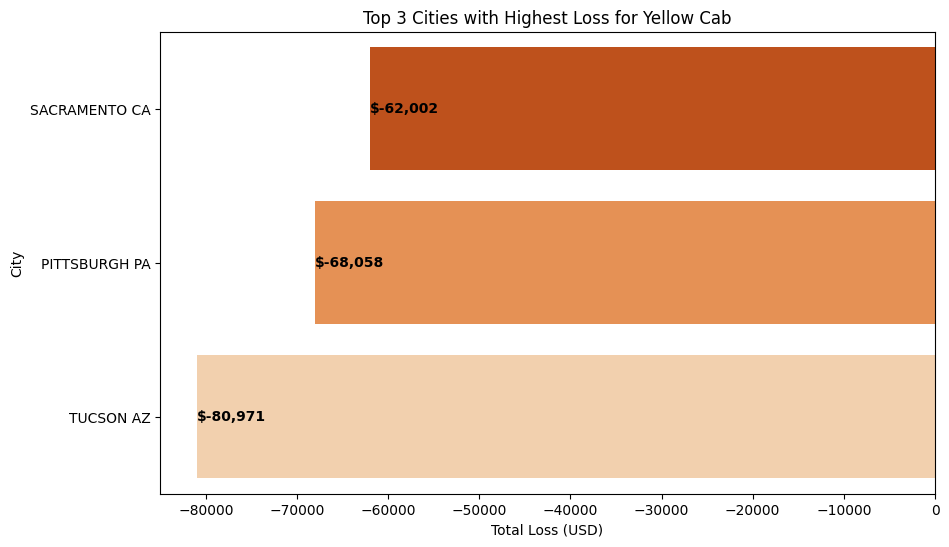

In [276]:
# Filter only Yellow Cab data
yellow_cab_data = df_cab[df_cab['Company'] == 'Yellow Cab'].copy()

# Calculate the loss as negative profit
yellow_cab_data['Loss'] = yellow_cab_data['Cost of Trip'] - yellow_cab_data['Price Charged']

# Group by City and sum the Loss
loss_by_city_yellow = yellow_cab_data.groupby('City')['Loss'].sum().reset_index()

# Sort by Loss and get the top 3 cities with the highest loss
top_3_loss_cities_yellow = loss_by_city_yellow.sort_values(by='Loss', ascending=False).head(3)

# Plotting the top 3 cities with the highest loss for Yellow Cab
plt.figure(figsize=(10, 6))
sns.barplot(x='Loss', y='City', data=top_3_loss_cities_yellow, palette='Oranges_r', orient='h', legend=False)

# Add the dollar amount on top of each bar
for index, value in enumerate(top_3_loss_cities_yellow['Loss']):
    plt.text(value, index, f'${value:,.0f}', va='center', ha='left', color='black', fontweight='bold')

plt.title('Top 3 Cities with Highest Loss for Yellow Cab')
plt.xlabel('Total Loss (USD)')
plt.ylabel('City')
plt.show()

/var/folders/fs/nc20m2757gj4y9jxvh_1hnph0000gn/T/ipykernel_33699/1281965421.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loss', y='City', data=top_3_loss_cities_pink, palette='Oranges_r', orient='h', legend=False)


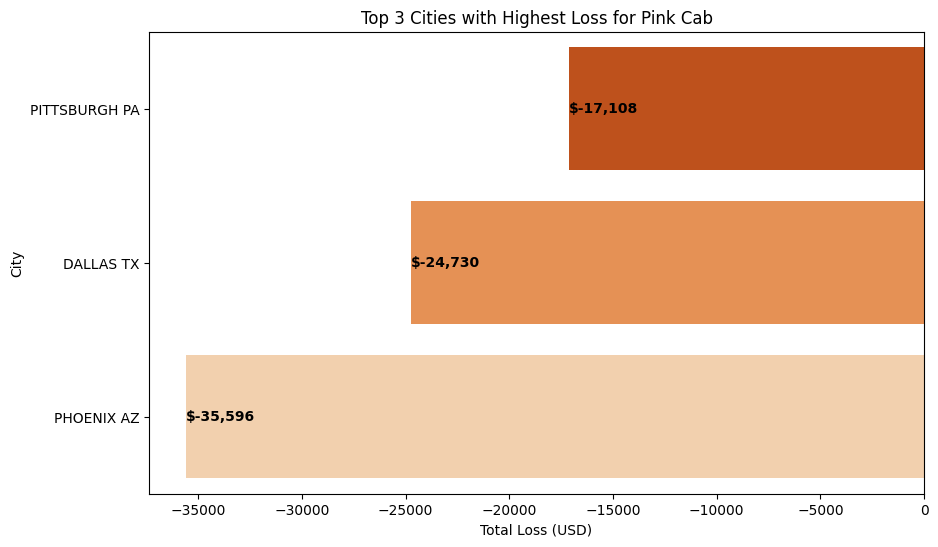

In [277]:
# Filter only Pink Cab data
pink_cab_data = df_cab[df_cab['Company'] == 'Pink Cab'].copy()

# Calculate the loss as negative profit
pink_cab_data['Loss'] = pink_cab_data['Cost of Trip'] - pink_cab_data['Price Charged']

# Group by City and sum the Loss
loss_by_city_pink = pink_cab_data.groupby('City')['Loss'].sum().reset_index()

# Sort by Loss and get the top 3 cities with the highest loss
top_3_loss_cities_pink = loss_by_city_pink.sort_values(by='Loss', ascending=False).head(3)

# Plotting the top 3 cities with the highest loss for Pink Cab
plt.figure(figsize=(10, 6))
sns.barplot(x='Loss', y='City', data=top_3_loss_cities_pink, palette='Oranges_r', orient='h', legend=False)

# Add the dollar amount on top of each bar
for index, value in enumerate(top_3_loss_cities_pink['Loss']):
    plt.text(value, index, f'${value:,.0f}', va='center', ha='left', color='black', fontweight='bold')

plt.title('Top 3 Cities with Highest Loss for Pink Cab')
plt.xlabel('Total Loss (USD)')
plt.ylabel('City')
plt.show()